<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Logistic Regression - Diabetes Dataset</b></p>

# <font color='palevioletred'> <b>Importing Libraries</b><font color='black'>  

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='palevioletred'> <b>Loading Dataset</b><font color='black'>  

In [6]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
541,3,128,72,25,190,32.4,0.549,27,1
579,2,197,70,99,0,34.7,0.575,62,1
327,10,179,70,0,0,35.1,0.200,37,0
50,1,103,80,11,82,19.4,0.491,22,0
134,2,96,68,13,49,21.1,0.647,26,0


**About Dataset**

This dataset contains data from diabetes studies on Pima Native American women living in Arizona.

The dataset includes the following features:

   1. **Pregnancies:** Number of pregnancies.<br>
   2. **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test.<br>
   3. **Blood Pressure:** Blood pressure (mm Hg).<br>
   4. **Skin Thickness:** Triceps skinfold thickness (mm).<br>
   5. **Insulin:** 2-hour serum insulin (mu U/ml).<br>
   6. **BMI:** Body mass index (weight kg/(height m)^2).<br>
   7. **Diabetes Pedigree Function:** Diabetes pedigree function, a function that determines the likelihood of diabetes based on family history.<br>
   8. **Age:** Age (years).<br>
   9. **Outcome:** The class label (0 or 1) indicates whether the person has diabetes. 1 indicates that he has diabetes, 0 indicates that he does not have d

This dataset is widely used to train machine learning algorithms and for use in binary classification problems such as predicting diabetes. The dataset is used especially for data preprocessing, feature engineering and comparing the performance of classification algorithms.

Typical applications using the dataset include understanding which patient profiles are at risk for diabetes, determining which characteristics increase the likelihood of diabetes, and developing predictive models to help automatically diagnose diabetes.

It is important to note that the nature of the dataset may present challenges such as some features may be missing or it may have an unbalanced class distribution. Such challenges provide an opportunity to delve deeper into machine learning topics such as data cleaning, missing data imputation, handling imbalanced datasets, and model validation techniques.iabetes.<br>

# <font color='palevioletred'> <b>EDA</b><font color='black'>  

In [13]:
df.shape

(768, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

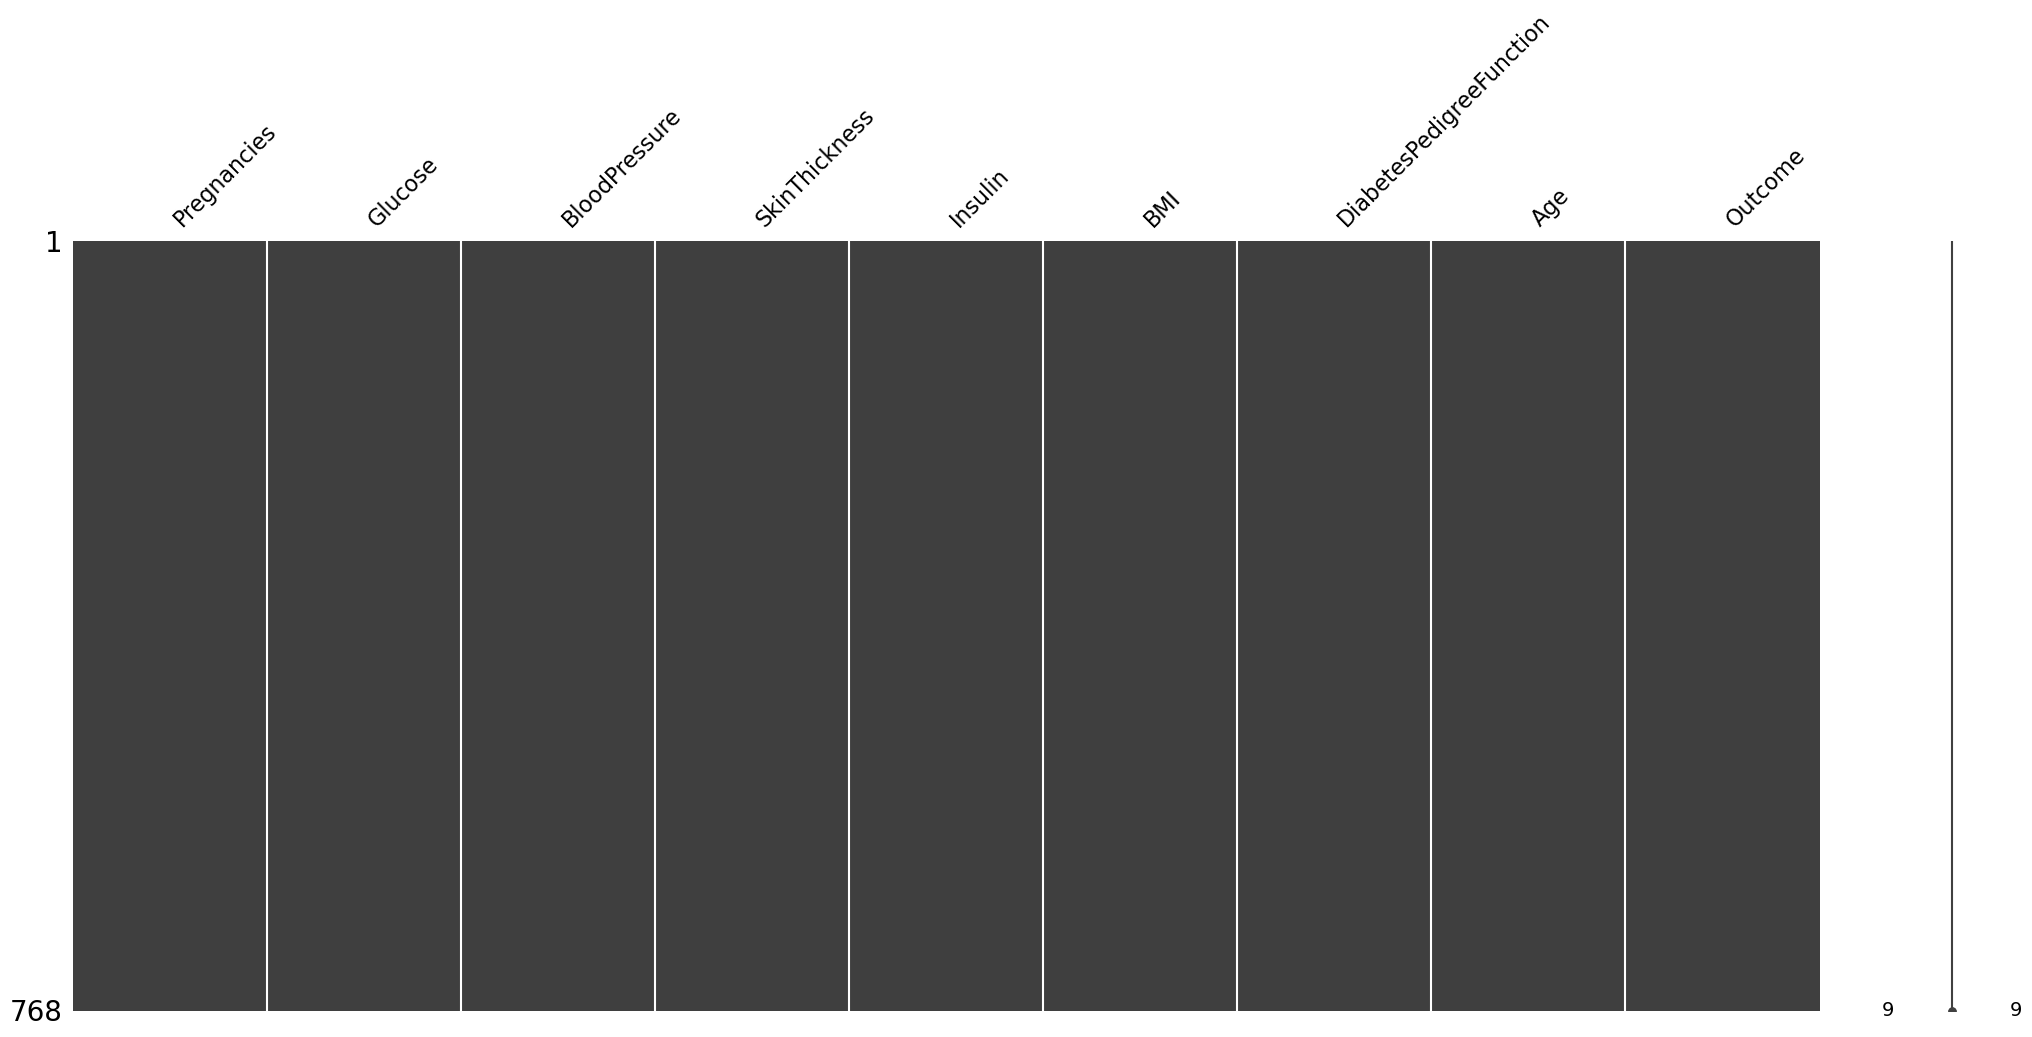

In [27]:
msno.matrix(df);

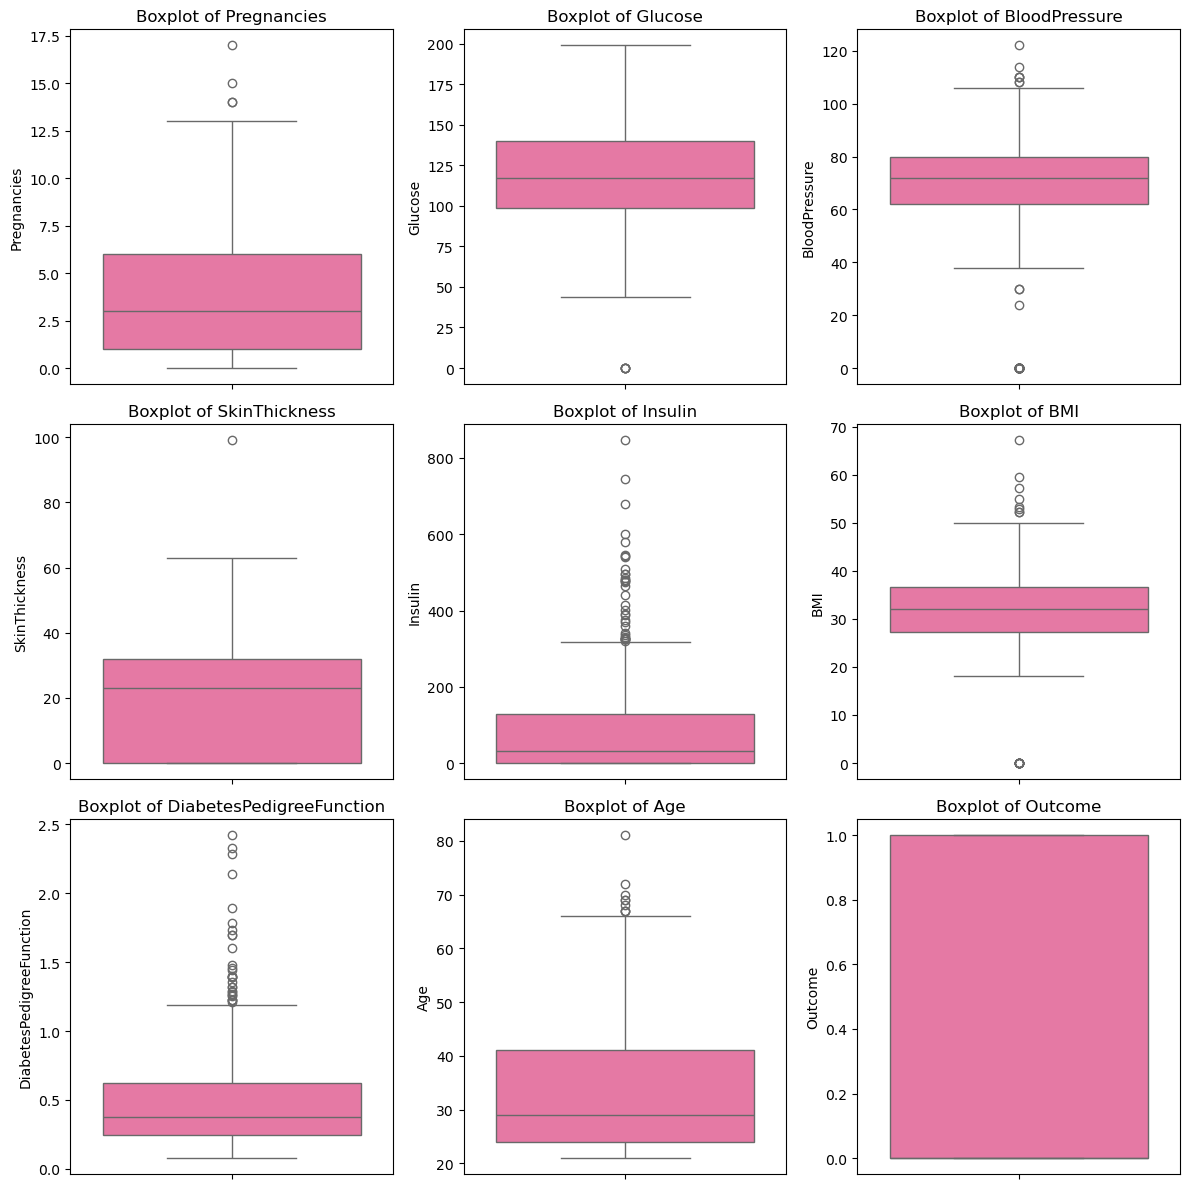

In [47]:
numeric_columns = df.select_dtypes(include="number").columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))

axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i], palette='RdPu')
    axes[i].set_title(f"Boxplot of {col}")

for j in range(len(numeric_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

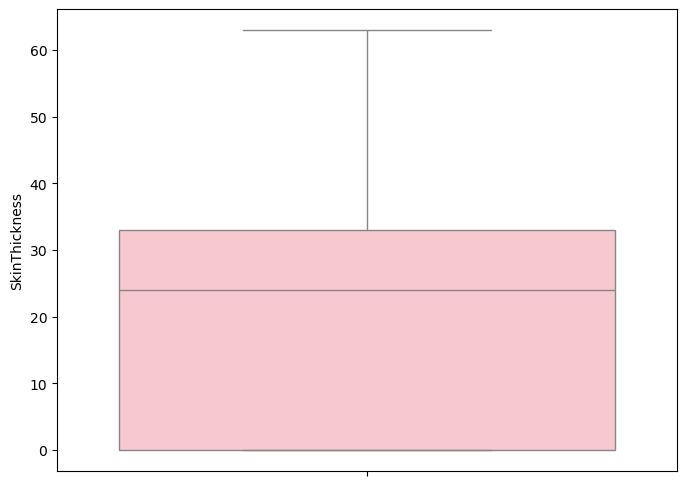

In [77]:
# Since the outliers in the skin thickness column are unusual, we take values ​​less than 70.
df = df[df.SkinThickness<70]
sns.boxplot(df.SkinThickness, color='pink');

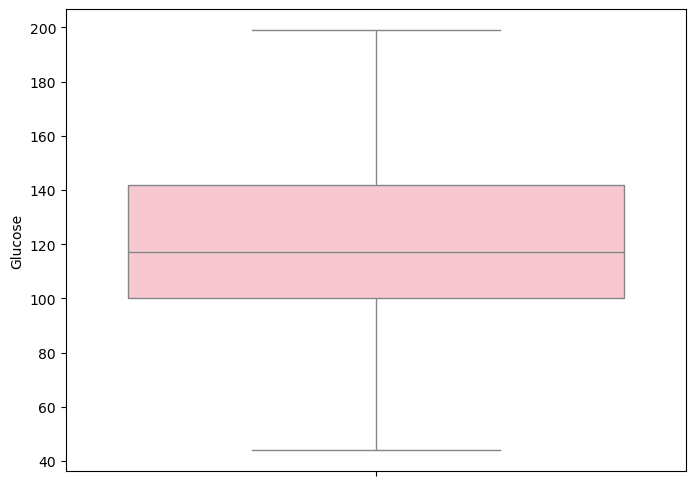

In [79]:
# Glucose value cannot be 0. That's why we take values ​​greater than 0.
df = df[df.Glucose>0]
sns.boxplot(df.Glucose, color='pink');

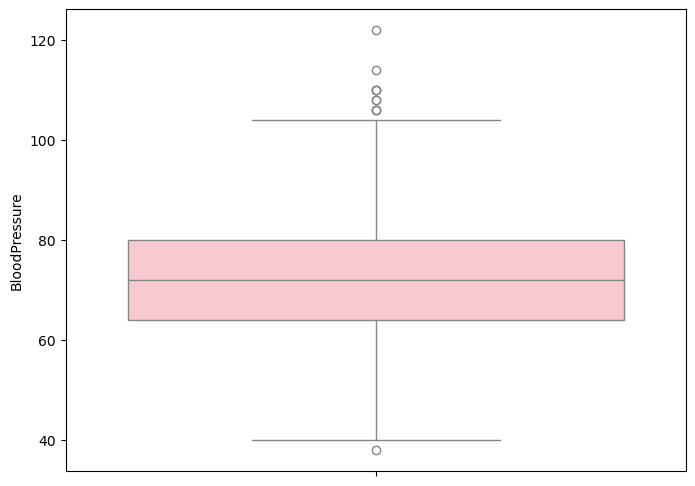

In [81]:
df = df[df.BloodPressure>35]
sns.boxplot(df.BloodPressure, color='pink');

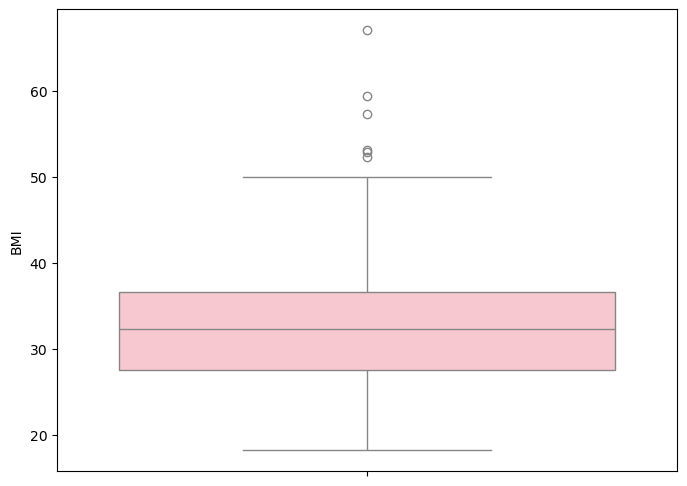

In [83]:
df = df[df.BMI>0]
sns.boxplot(df.BMI, color='pink');

In [67]:
df.shape

(720, 9)

In [69]:
df.Outcome.value_counts()

# this data is unbalanced data!!

Outcome
0    473
1    247
Name: count, dtype: int64

In [71]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64

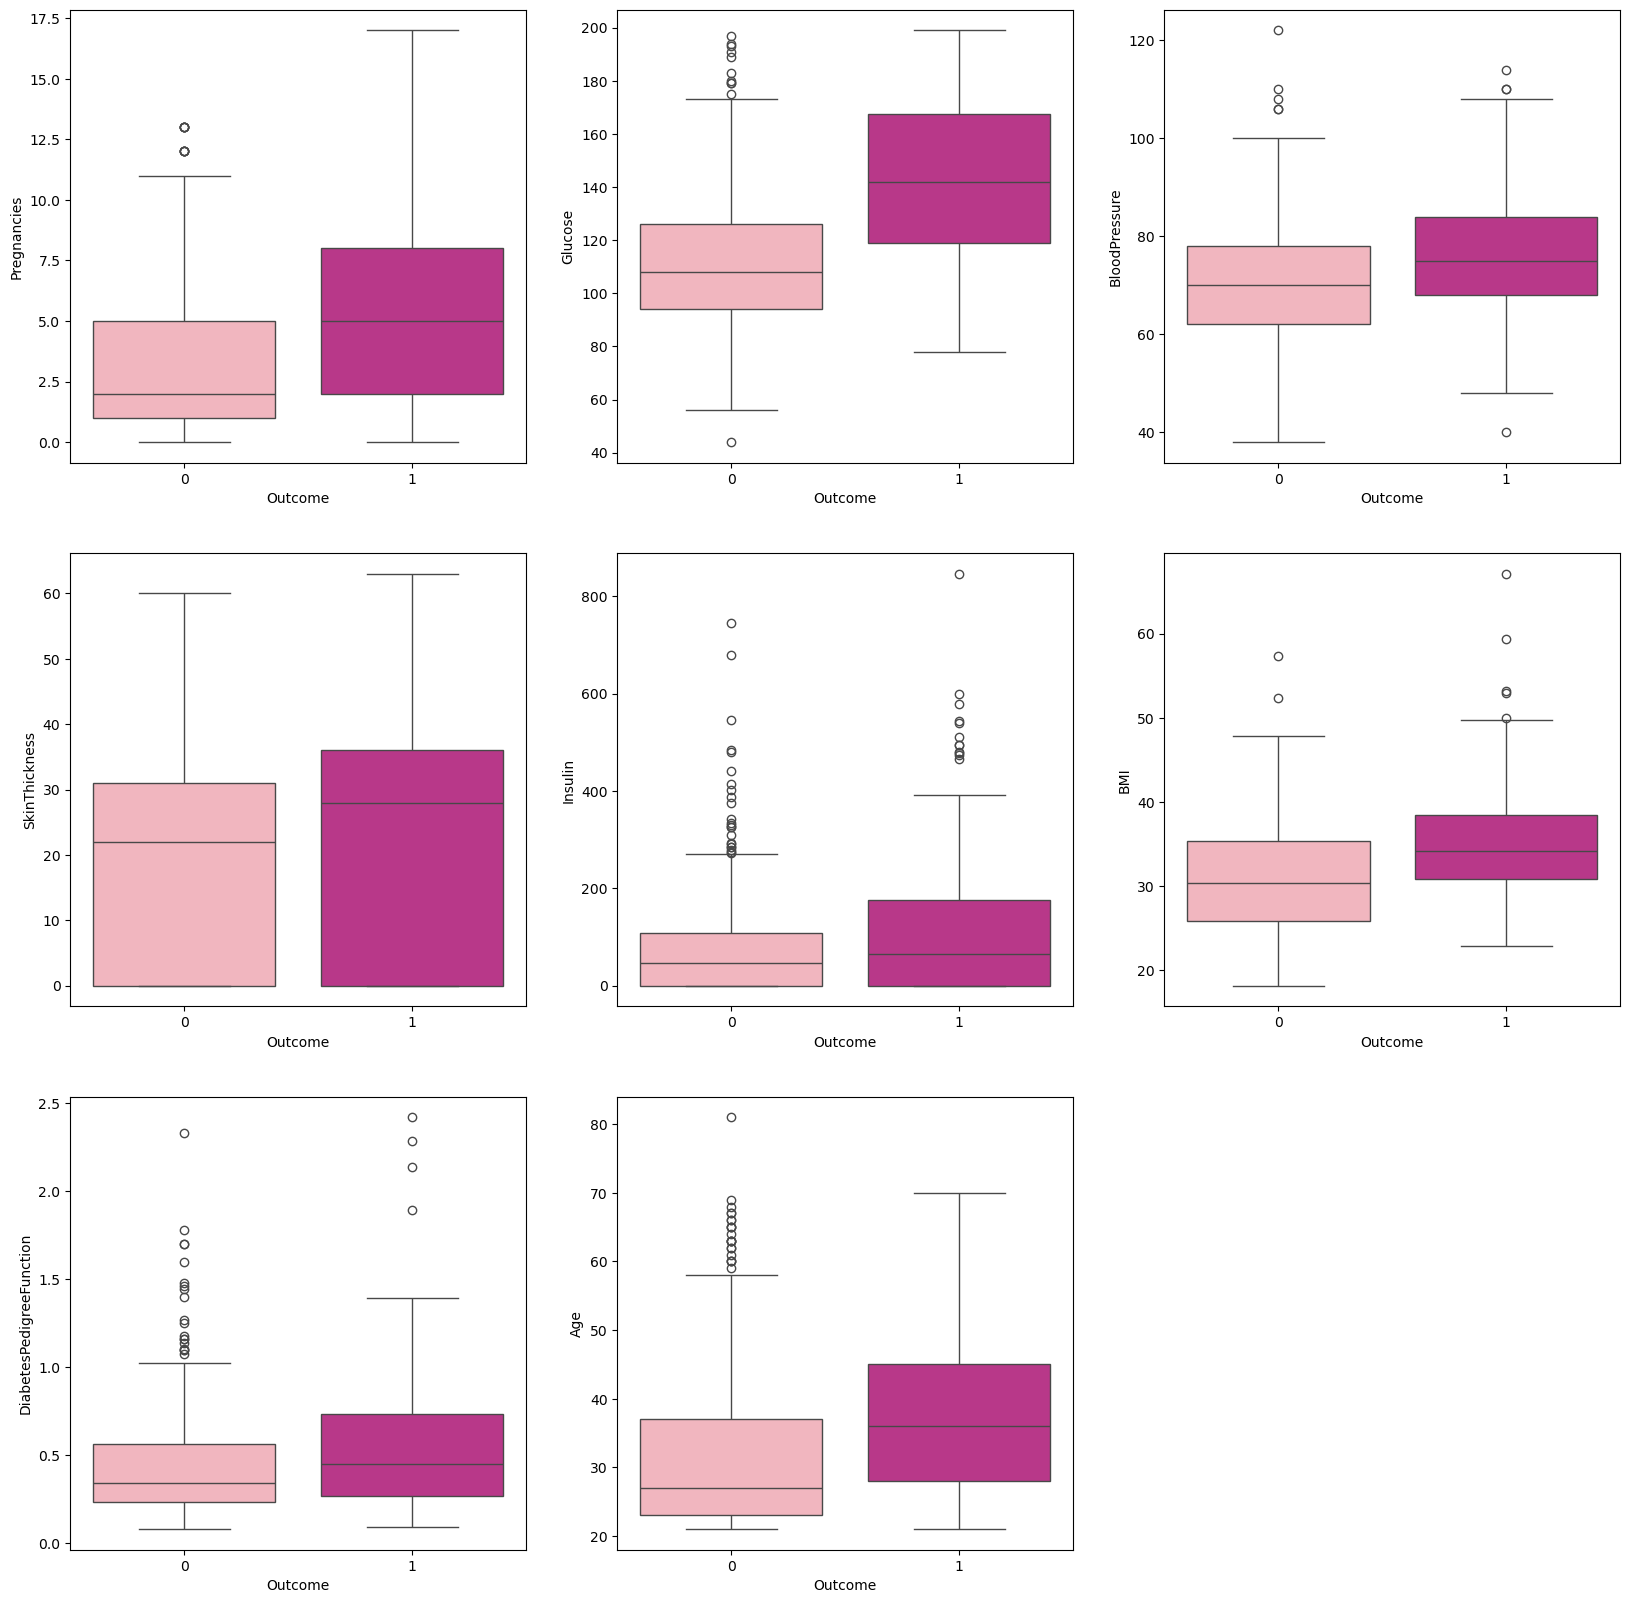

In [75]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df, palette='RdPu')
plt.show()

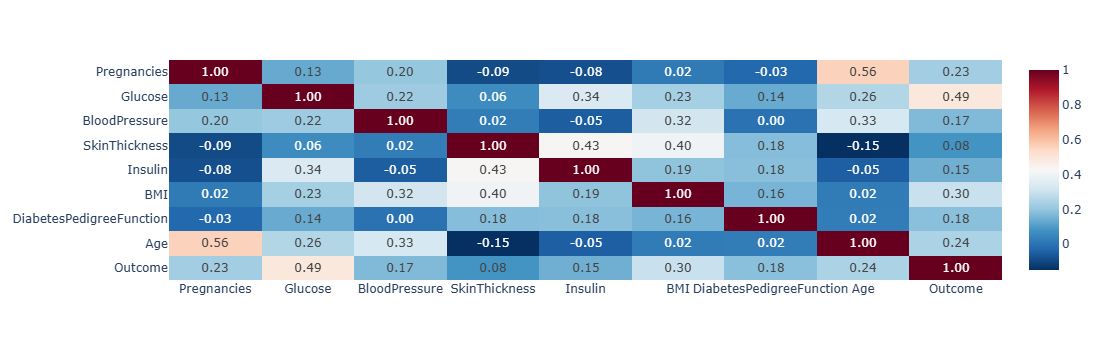

<Figure size 800x600 with 0 Axes>

In [91]:
import plotly.express as px
plt.figure(figsize=(8,6))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

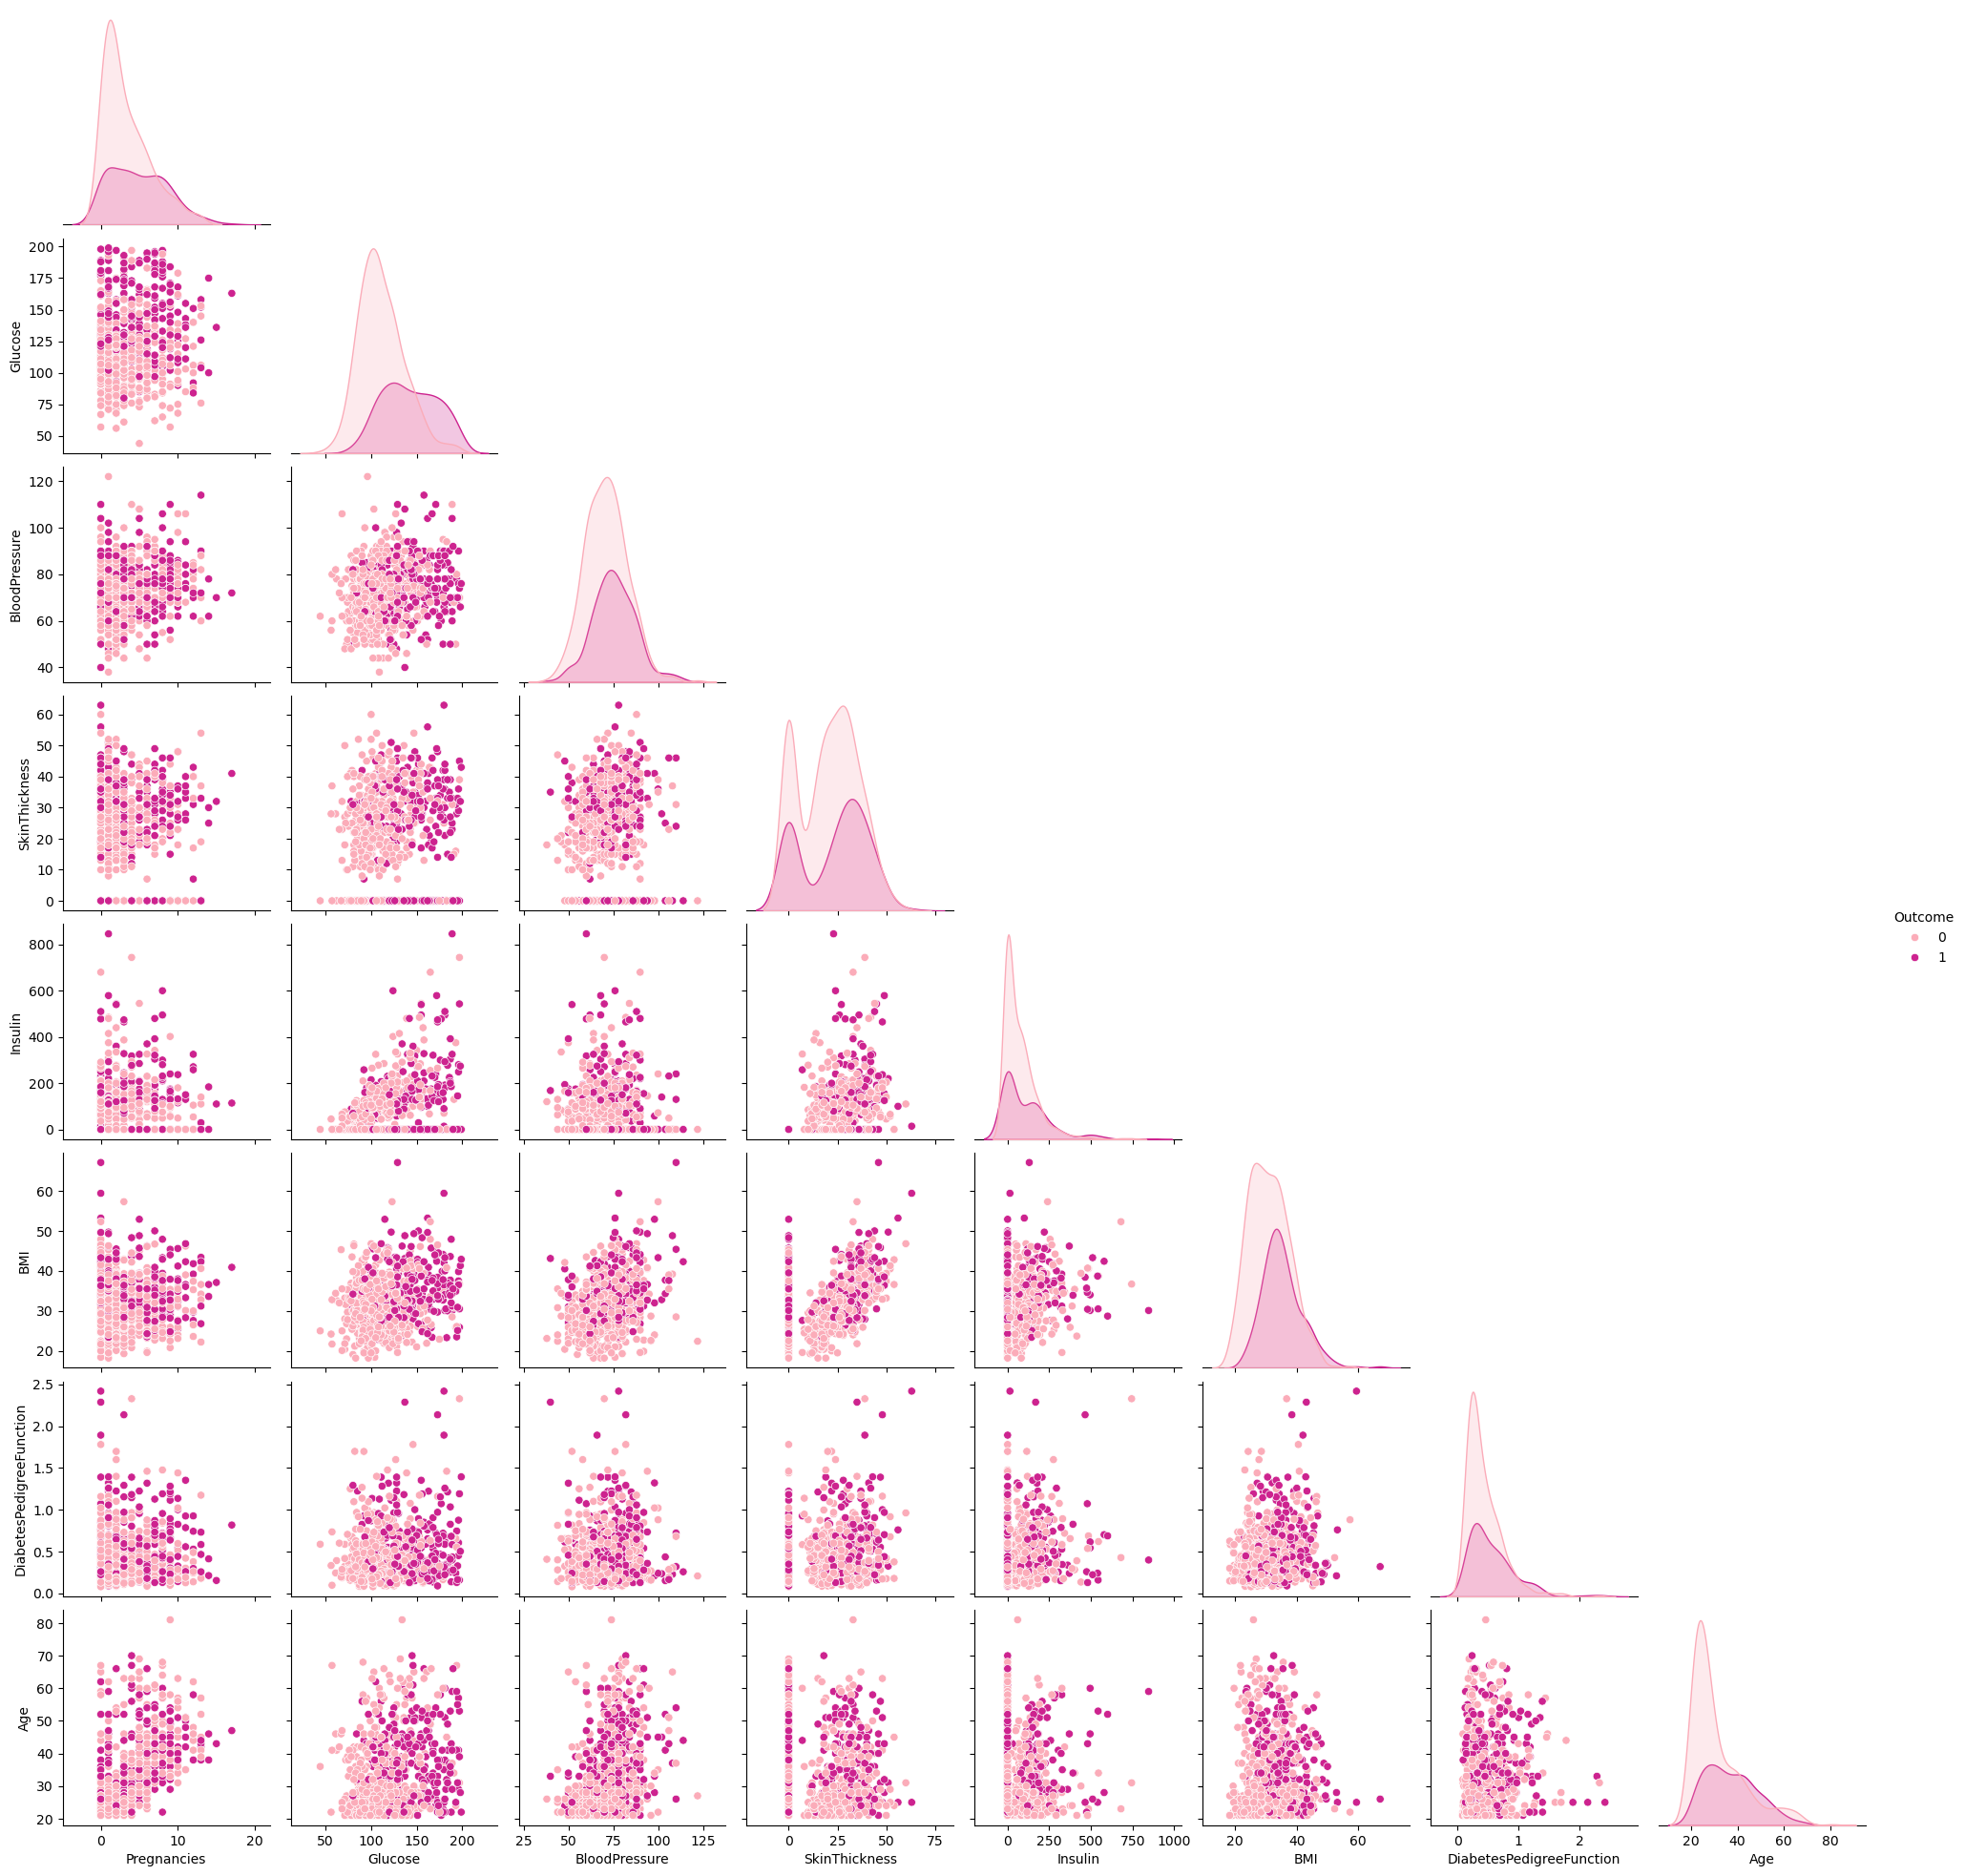

In [95]:
sns.pairplot(df, hue = "Outcome", corner=True, palette='RdPu');

# <font color='palevioletred'> <b>Defining X and y</b><font color='black'>  

In [97]:
X = df.drop(columns="Outcome")
y = df.Outcome

# <font color='palevioletred'> <b>Train-Test Split</b><font color='black'>  

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# When separating classification data into train and test sets, if our data is unbalanced, we must use the stratify=y parameter.
# Stratify parameter preserves the ratio of 0 and 1 classes to each other in both train data and test data.

# If this parameter is not used in unbalanced data, the fewer classes may be distributed unevenly to the train or test set. This naturally reduces the scores of the unbalanced class.

# You can use stratify=y whether your data is balanced or unbalanced.

# <font color='palevioletred'> <b>Modeling</b><font color='black'>  

In [101]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [103]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
y_pred_proba = pipe_model.predict_proba(X_test)

In [109]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # Probability of belonging to class 1
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
461,1,71,62,0,0,21.8,0.416,26,0,0,0.017959
673,3,123,100,35,240,57.3,0.880,22,0,1,0.766321
691,13,158,114,0,0,42.3,0.257,44,1,1,0.894732
735,4,95,60,32,0,35.4,0.284,28,0,0,0.187398
668,6,98,58,33,190,34.0,0.430,43,0,0,0.223025
465,0,124,56,13,105,21.8,0.452,21,0,0,0.091820
403,9,72,78,25,0,31.6,0.280,38,0,0,0.105927
630,7,114,64,0,0,27.4,0.732,34,1,0,0.321969
114,7,160,54,32,175,30.5,0.588,39,1,1,0.730861
716,3,173,78,39,185,33.8,0.970,31,1,1,0.774886


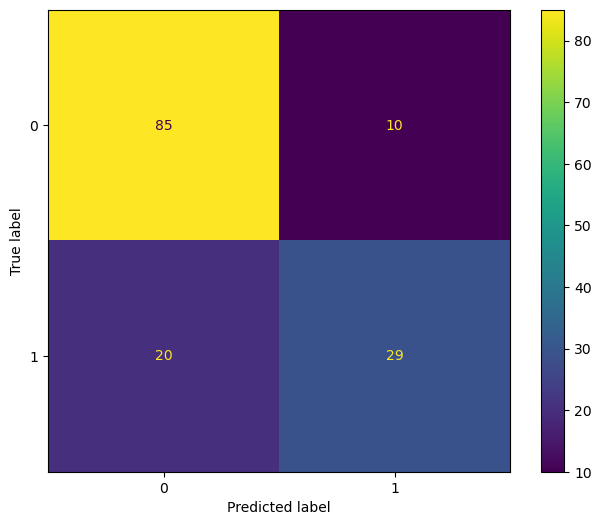

In [111]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [113]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## <font color='pink'> <b>Cross Validation</b><font color='black'>  

In [118]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['precision','recall','f1','accuracy'], # Maximizes the scores of class 1.
                        cv = cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores.mean()[2:]

test_precision     0.711236
train_precision    0.722445
test_recall        0.545526
train_recall       0.552191
test_f1            0.615949
train_f1           0.625882
test_accuracy      0.765578
train_accuracy     0.773150
dtype: float64

## <font color='pink'> <b>Cross Validate for 0 Class</b><font color='black'>  

In [121]:
f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## <font color='pink'> <b>GridSearchCV</b><font color='black'>  

In [124]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [126]:
pipe_model.set_params(logistic__C= 0.5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.5))])

In [128]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # It is recommended to give values ​​for coefficients by taking logspace
class_weight= ["balanced", None] # will fix if there is unbalance

# We can use class_weight= "balanced" to balance classes in unbalanced data sets. 
# When the data is balanced, the model tries to increase the recall score of that class by increasing the precision score of the less class.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

In [130]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [132]:
grid_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

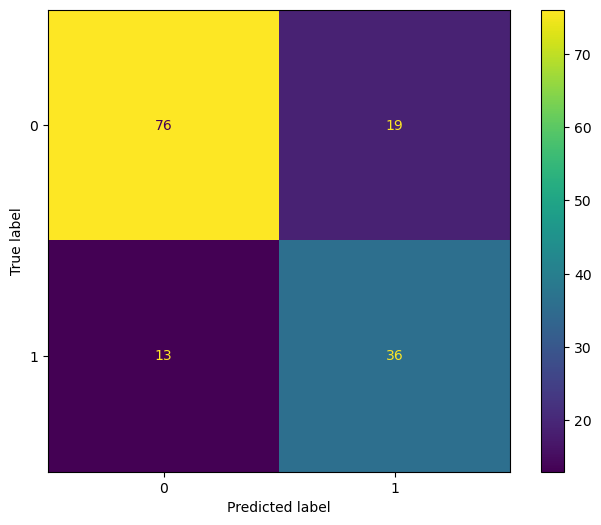

In [134]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

In [136]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## <font color='pink'> <b>ROC (Receiver Operating Curve) | PRC (Presicion Recall Curve) | AUC (Area Under Curve)</b><font color='black'>  

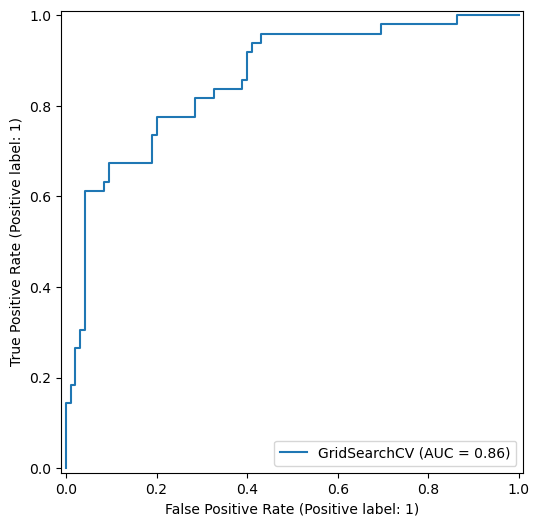

In [141]:
# ROC
RocCurveDisplay.from_estimator(grid_model, X_test, y_test);

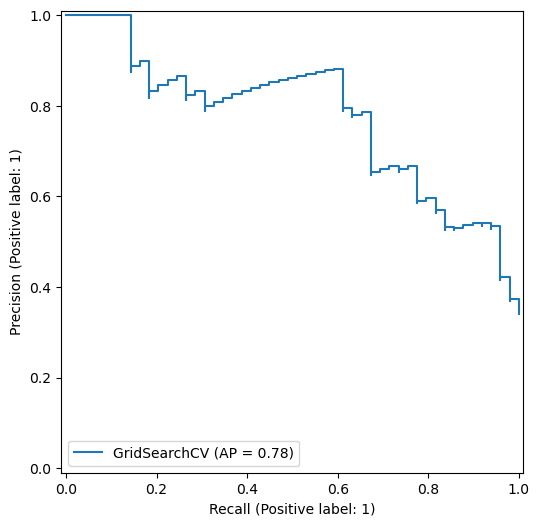

In [139]:
# PRC
PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test);

Normally, in projects to be carried out, the final model is decided after the project evaluation metrics are improved. Since the purpose of this notebook is to learn and reinforce ML models, we will leave it here for now and move on to the final model part.

# <font color='palevioletred'> <b>Final Model</b><font color='black'>  

In [144]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]
final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [146]:
import pickle

In [148]:
pickle.dump(final_model, open("final_model", "wb"))

# <font color='palevioletred'> <b>Prediction</b><font color='black'>  

In [150]:
new_model = pickle.load(open("final_model", "rb"))

In [152]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,100,75,30,80,25,0.4,30
1,4,110,80,25,120,35,0.5,40
2,5,120,70,20,130,30,0.6,35


In [160]:
predictions = new_model.predict(sample)
predictions

array([0, 0, 0], dtype=int64)

In [162]:
predictions_proba = new_model.predict_proba(sample)
predictions_proba

array([[0.82609586, 0.17390414],
       [0.55556334, 0.44443666],
       [0.53796648, 0.46203352]])

In [164]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred
0,3,100,75,30,80,25,0.4,30,0.173904,0
1,4,110,80,25,120,35,0.5,40,0.444437,0
2,5,120,70,20,130,30,0.6,35,0.462034,0


<p style="background-color:palevioletred;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>